<a href="https://colab.research.google.com/github/yalem123/Fraud-detection-project-Adey-Innovations/blob/main/Fraud_Detection_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

fraud_df = pd.read_csv('Fraud_Data.csv')
ip_df = pd.read_csv('IpAddress_to_Country.csv')
credit_df = pd.read_csv('creditcard.csv')


FileNotFoundError: [Errno 2] No such file or directory: 'Fraud_Data.csv'

In [1]:
from google.colab import files
uploaded = files.upload()


Saving creditcard.csv to creditcard.csv


In [7]:
from google.colab import files
uploaded = files.upload()

Saving Fraud_Data.csv to Fraud_Data.csv


In [21]:
from google.colab import files
uploaded = files.upload()

Saving IpAddress_to_Country.csv to IpAddress_to_Country.csv


In [22]:
import pandas as pd

fraud_df = pd.read_csv('Fraud_Data.csv')
ip_df = pd.read_csv('IpAddress_to_Country.csv')
credit_df = pd.read_csv('creditcard.csv')


In [9]:
fraud_df.isnull().sum()
credit_df.isnull().sum()


,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [10]:
fraud_df.drop_duplicates(inplace=True)
fraud_df['signup_time'] = pd.to_datetime(fraud_df['signup_time'])
fraud_df['purchase_time'] = pd.to_datetime(fraud_df['purchase_time'])


<Axes: xlabel='class', ylabel='count'>

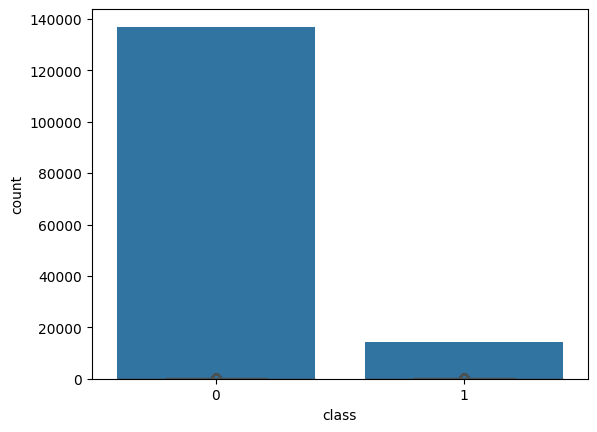

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='class', data=fraud_df)
sns.boxplot(x='class', y='purchase_value', data=fraud_df)


In [11]:
!pip install shap xgboost imbalanced-learn


In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ipaddress
import shap
import xgboost as xgb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, precision_recall_curve
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler


In [25]:
fraud_df = pd.read_csv('Fraud_Data.csv')
#ip_df = pd.read_csv('IpAddress_to_Country.csv')
credit_df = pd.read_csv('creditcard.csv')


In [26]:
fraud_df.head()
#ip_df.head()
credit_df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [17]:
# Check missing values in each dataset
print("Missing values in Fraud_Data:")
print(fraud_df.isnull().sum())

#print("\nMissing values in IpAddress_to_Country:")
#print(ip_df.isnull().sum())

print("\nMissing values in Credit Card Data:")
print(credit_df.isnull().sum())


Missing values in Fraud_Data:
user_id           0
signup_time       0
purchase_time     0
purchase_value    0
device_id         0
source            0
browser           0
sex               0
age               0
ip_address        0
class             0
dtype: int64

Missing values in Credit Card Data:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [ ]:
# 1. Remove duplicates
fraud_df.drop_duplicates(inplace=True)
ip_df.drop_duplicates(inplace=True)
credit_df.drop_duplicates(inplace=True)

# 2. Convert timestamps to datetime
fraud_df['signup_time'] = pd.to_datetime(fraud_df['signup_time'])
fraud_df['purchase_time'] = pd.to_datetime(fraud_df['purchase_time'])

# 3. Check data types
print("Fraud Data Types:\n", fraud_df.dtypes)
print("\nIP Data Types:\n", ip_df.dtypes)
print("\nCredit Card Data Types:\n", credit_df.dtypes)


Fraud Data Types:
 user_id                    int64
signup_time       datetime64[ns]
purchase_time     datetime64[ns]
purchase_value             int64
device_id                 object
source                    object
browser                   object
sex                       object
age                        int64
ip_address               float64
class                      int64
dtype: object

IP Data Types:
 lower_bound_ip_address    float64
upper_bound_ip_address      int64
country                    object
dtype: object

Credit Card Data Types:
 Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       flo

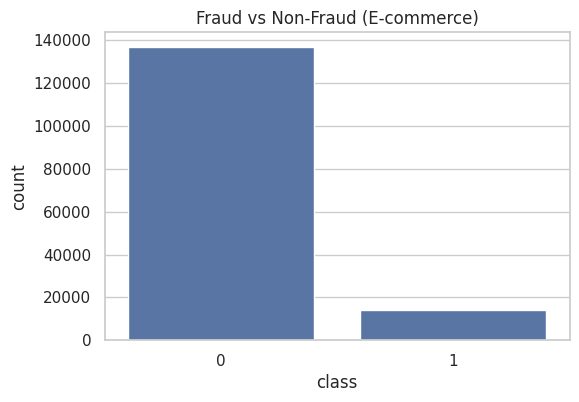

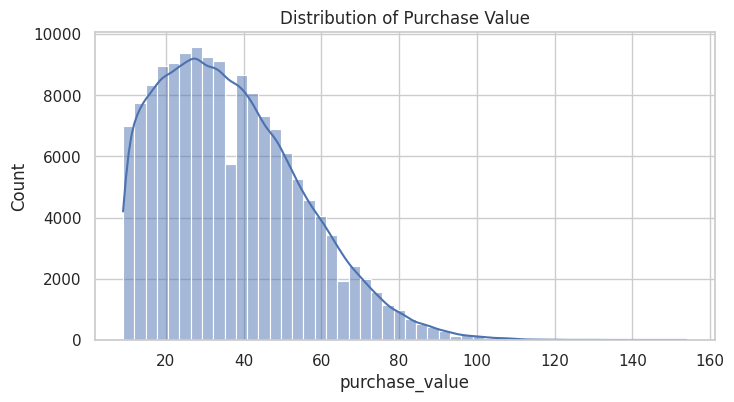

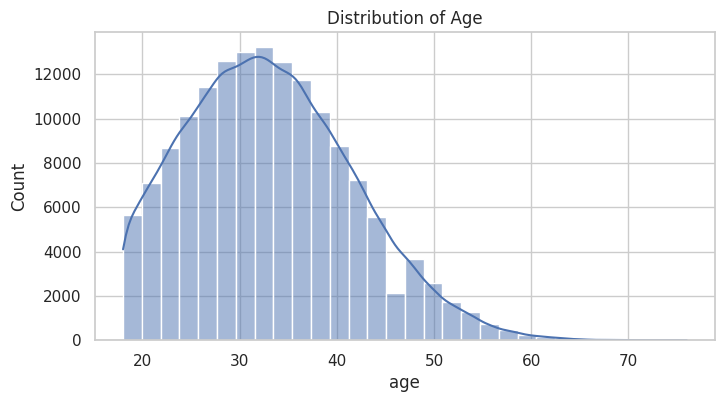

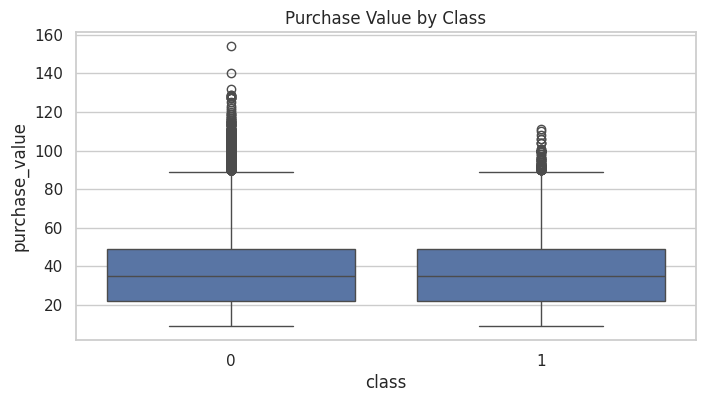

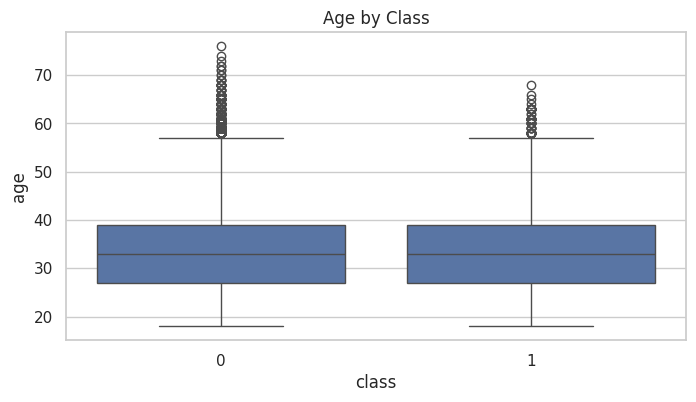

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set style
sns.set(style="whitegrid")

# --- Univariate Analysis ---

# Fraud class distribution (e-commerce)
plt.figure(figsize=(6,4))
sns.countplot(x='class', data=fraud_df)
plt.title('Fraud vs Non-Fraud (E-commerce)')
plt.show()

# Purchase value distribution
plt.figure(figsize=(8,4))
sns.histplot(fraud_df['purchase_value'], bins=50, kde=True)
plt.title('Distribution of Purchase Value')
plt.show()

# Age distribution
plt.figure(figsize=(8,4))
sns.histplot(fraud_df['age'], bins=30, kde=True)
plt.title('Distribution of Age')
plt.show()

# --- Bivariate Analysis ---

# Purchase value by class
plt.figure(figsize=(8,4))
sns.boxplot(x='class', y='purchase_value', data=fraud_df)
plt.title('Purchase Value by Class')
plt.show()

# Age by class
plt.figure(figsize=(8,4))
sns.boxplot(x='class', y='age', data=fraud_df)
plt.title('Age by Class')
plt.show()


In [ ]:
import ipaddress

# Convert IP address to integer
fraud_df['ip_int'] = fraud_df['ip_address'].astype(int)

# Convert IP range bounds to integers
ip_df['lower_bound_ip_address'] = ip_df['lower_bound_ip_address'].astype(int)
ip_df['upper_bound_ip_address'] = ip_df['upper_bound_ip_address'].astype(int)


In [ ]:
# Sort IP ranges for faster lookup
ip_df = ip_df.sort_values(by='lower_bound_ip_address')

# Function to find country for a given IP
def find_country(ip_int):
    match = ip_df[(ip_df['lower_bound_ip_address'] <= ip_int) & (ip_df['upper_bound_ip_address'] >= ip_int)]
    if not match.empty:
        return match.iloc[0]['country']
    return 'Unknown'

# Apply the function
fraud_df['country'] = fraud_df['ip_int'].apply(find_country)


In [ ]:
fraud_df[['ip_address', 'ip_int', 'country']].head()



,ip_address,ip_int,country
0,7.327584e+08,732758368,Japan
1,3.503114e+08,350311387,United States
2,2.621474e+09,2621473820,United States
3,3.840542e+09,3840542443,Unknown
4,4.155831e+08,415583117,United States


In [29]:
# Convert timestamps to datetime
fraud_df['signup_time'] = pd.to_datetime(fraud_df['signup_time'])
fraud_df['purchase_time'] = pd.to_datetime(fraud_df['purchase_time'])

# Hour of day
fraud_df['hour_of_day'] = fraud_df['purchase_time'].dt.hour

# Day of week
fraud_df['day_of_week'] = fraud_df['purchase_time'].dt.dayofweek

# Time since signup (in seconds)
fraud_df['time_since_signup'] = (fraud_df['purchase_time'] - fraud_df['signup_time']).dt.total_seconds()

# Preview the new features
fraud_df[['purchase_time', 'hour_of_day', 'day_of_week', 'time_since_signup']].head()

,purchase_time,hour_of_day,day_of_week,time_since_signup
0,2015-04-18 02:47:11,2,5,4506682.0
1,2015-06-08 01:38:54,1,0,17944.0
2,2015-01-01 18:52:45,18,3,1.0
3,2015-05-04 13:54:50,13,0,492085.0
4,2015-09-09 18:40:53,18,2,4361461.0


In [ ]:
fraud_df['class'].value_counts(normalize=True)


,proportion
class,
0,0.906354
1,0.093646


In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import ipaddress
import pandas as pd

# Load the fraud data
fraud_df = pd.read_csv('Fraud_Data.csv')

# Convert IP address to integer and then to string
# Handle potential NaN values by converting to integer only if not null, then to string
fraud_df['ip_int'] = fraud_df['ip_address'].apply(lambda x: str(int(x)) if pd.notnull(x) else None)

# Select features and target
X = fraud_df.drop(columns=['class', 'signup_time', 'purchase_time', 'ip_address', 'ip_int'])  # drop unused or redundant
y = fraud_df['class']

# One-hot encode categorical features
X = pd.get_dummies(X, drop_first=True)

# Train-test split (stratify to preserve class ratio)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Apply SMOTE to training data only
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check new class distribution
print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_train_resampled.value_counts())